In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy
import plotly
from plotly import graph_objs as go
from plotly.offline import iplot, plot, init_notebook_mode

In [113]:
def findTheta (a,b,c,d):
    theta = np.arctan((np.absolute(a-c))/(np.absolute(b-d)))
    m = (b-d)/(a-c)
    if m > 0:
        theta =-theta
    return theta

In [114]:
def rotateLine(xs,ys,theta,a,b):
    nx=[]
    ny=[]
    R = [[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]
    for i in range(0,len(xs)):
        A =[xs[i]-a,ys[i]-b]
        xy=np.array(np.matmul(A,R))
        nx.append(xy[0])
        ny.append(xy[1])
    return(nx, ny)

In [115]:
def mainRootArrays(a,b,c,d):
    xs = np.linspace(a,c)
    m=(b-d)/(a-c)
    ys= m*(xs-a)+b
    return(xs,ys)

In [116]:
def findBest(Tmax,G,p,q,a):
    t=0
    bestLength= 1000000000000.0
    bestT = t
    while t >= Tmax:
        b = (q - G * (p**2) - t)/p
        if p>0:
            x =np.linspace(0, p, num=50)
        elif p < 0:
            x =np.linspace(p, 0, num=50)
        lot = np.sqrt(1+(2*G*x + ((q-G*(p**2)-t)/p))**2)
        y= a*(lot) +(1-a)*(lot - t)
        length = scipy.integrate.trapezoid(y,x)
        if length < bestLength:
            #ploting(Tmax,p,q,bestT,G) #comparing possible lines
            bestLength = length
            bestT = t
        t = t - 0.01 #last 
    #ploting(Tmax,p,q,bestT,G)
    #print("length: " + str(bestLength) +" t= " + str(bestT))
    return(bestLength,bestT)

In [117]:
def reAngle(xs, ys, theata, a,b):
    nx =[]
    ny=[]
    R = [[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]
    inR = np.linalg.inv(R)
    ab= [a,b]
    for i in range(0, len(xs)):
        Ap = [xs[i],ys[i]]
        xy=np.array(np.add(np.matmul(Ap,inR),ab))
        nx.append(xy[0])
        ny.append(xy[1])
    return(nx, ny)

In [118]:
def plotDeAngle (tmax,G,p,q,t):
    x = np.linspace(0,p)
    if p <0:
        x = np.linspace(p,0)
    b=(q - G*(p**2) -t)/p
    y=G * x**2 + b*x + t
    return (x,y)

In [119]:
def mainFind(a,b,c,d):
    xy = mainRootArrays(a,b,c,d)
    theta = findTheta(a,b,c,d)
    nxy = rotateLine(xy[0],xy[1],theta,a,b)
    aMain = go.Scatter(x = xy[0], y= xy[1], mode = 'lines', name = "angled")
    dMain = go.Scatter(x= nxy[0], y = nxy[1], mode = 'lines', name = "deangled")
    tmax = rotateLine([c],[d], theta, a,b)
    tmax = tmax[1][0]
    return (aMain,dMain, theta,tmax)

In [120]:
def deAngleCurve(G,al,p,q,theta,a,b):
    pq = rotateLine([p],[q], theta, a,b)
    pn = pq[0][0]
    qn = pq[1][0]
    best = findBest(tmax, G,pn,qn,al) #returns bestLength and bestT
    dPlotA = plotDeAngle(tmax, G, pn ,qn,best[1])
    dPlot = go.Scatter(x = dPlotA[0], y = dPlotA[1], mode= 'lines' , name = str(best[0]))
    raPlotA = reAngle(dPlotA[0], dPlotA[1],theta,a,b)
    raPlot = go.Scatter(x = raPlotA[0], y = raPlotA[1], mode = 'lines', name = str(best[0]))
    txy = reAngle([0],[best[1]], theta,a,b)
    return(best[0], txy, dPlot,raPlot)

enter a:  32
enter b:  17
enter c:  9
enter d:  12
enter G:  0.75
enter alpha value:  0.3
enter the number of points you would like to do:  1
enter p value for point: 1 15
endter q value for point: 1 11


[['p,q'], 'length', ['txy'], [[15.0, 11.0], 18.02990040562894, ([32.0], [17.0])]]


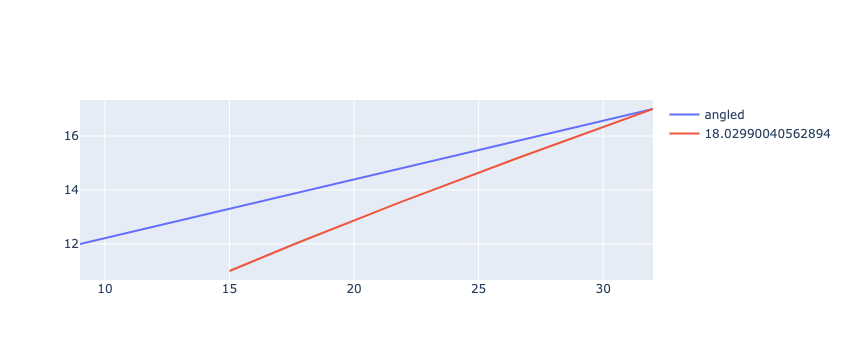

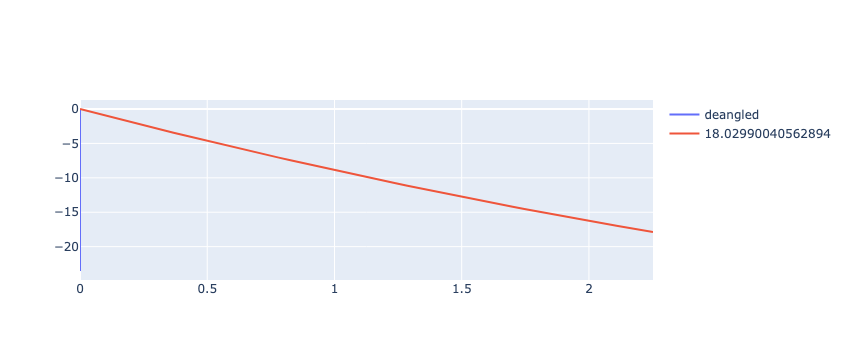

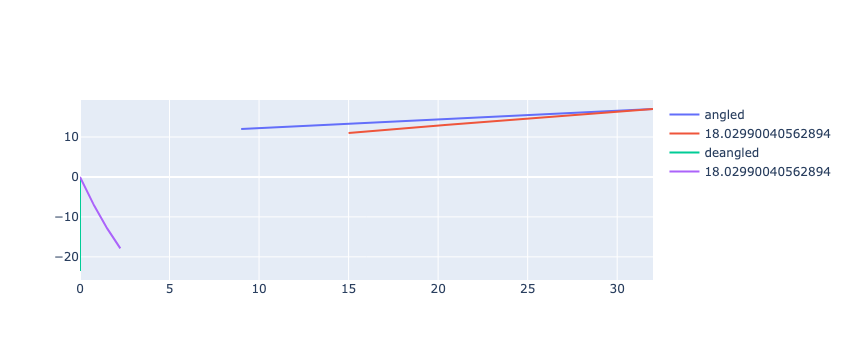

In [121]:
a = float(input("enter a: "))
b = float(input("enter b: ") )
c = float(input("enter c: "))
d = float(input("enter d: "))
G = float(input("enter G: "))
al = float(input("enter alpha value: "))
main = mainFind(a,b,c,d)
theta = main[2]
AngledPlot = [main[0]]
deAngledPlot = [main[1]]
tmax = main[3]
numPoints = int(input("enter the number of points you would like to do: "))
point=1
listOfTs=[["lenght","xt","yt","t"]]
RelInfo = [["p,q"],"length",["txy"]]
while point < (numPoints+1):
    p = float(input("enter p value for point: " +str(point)))
    q = float(input("endter q value for point: " + str(point)))
    ArrayDAC = deAngleCurve(G,al,p,q,theta,a,b) #returns length, txy, dplot, raplot
    info= [[p,q], ArrayDAC[0], ArrayDAC[1]]
    RelInfo.append(info)
    deAngledPlot.append(ArrayDAC[2])
    AngledPlot.append(ArrayDAC[3])
    point = point +1
print(RelInfo)
iplot(AngledPlot)
iplot(deAngledPlot)
iplot(AngledPlot +deAngledPlot)